<a href="https://colab.research.google.com/github/Ravitha/BIP-Laboratory/blob/master/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building Face Recognition System

Principal Component Analysis is a global face recognition algorithm which maps the images into lower dimensions (less than number of pixels in an image) to allow efficient classification. Here , we will use dataset Label Faces in the wild which is available through sklearn. sklearn is a popular machine learning package in python which supports most of the data mining tasks.

In [19]:
# Necessary Imports
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
# Load data
lfw_dataset = fetch_lfw_people(min_faces_per_person=100)
_, h, w = lfw_dataset.images.shape
print(h) #height of the image
print(w) # width of the image

62
47


In [21]:
#Obtain the data statistics
X = lfw_dataset.data # loads data
y = lfw_dataset.target # loads class labels (encoded as number)
target_names = lfw_dataset.target_names # loads the class names (identity of the person)
print(X.shape)
print(y.shape)

(1140, 2914)
(1140,)


There are 1140 images each of size 62*47. The images are encoded as one dimensional vectors. Let's display the image corresponding to row 1, class label and identity of person

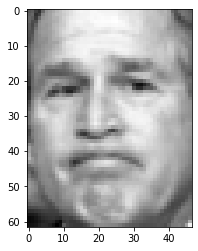

2
Colin Powell


In [23]:
img1 = X[0,:]. reshape(h,w)
plt.imshow(img1, cmap='gray')
plt.show()
print(y[0])
print(target_names[0])

In [24]:
print(np.unique(y, return_counts=True)) # While using machine learning, its a good practice to know the 
#number of images corresponding to each of the classes

(array([0, 1, 2, 3, 4]), array([236, 121, 530, 109, 144]))


# Dimensionality Reduction through PCA

We will use an library available in sklearn as its difficult to find PCA for vectors of larger dimension directly 

it is usually carried out through SVD

After PCA is carried out, Classify the instances based on reduced dimensions using Machine Learning algorithms. 
For reliable assessment of the classifier, the input data is divided into train and test 

In [0]:
from sklearn.model_selection import train_test_split
# split into a training and testing set
# This method splits the dataset into two 30% instances for test and 70% instances for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [26]:
print(X_train.shape)
print(X_test.shape)

(798, 2914)
(342, 2914)


Here 798 instances are used for training and 342 instances are used for testing.  The following section of code is used for computing PCA for train set

In [0]:
from sklearn.decomposition import PCA
# Compute a PCA 
n_components = 100
pca = PCA(n_components=n_components, whiten=True).fit(X_train)


Let's dig into what is learnt by the algorithm. We know PCA will compute mean vector 

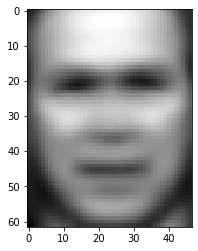

In [28]:
plt.imshow(pca.mean_.reshape(h,w),
           cmap='gray')

Similarly, each of the 100 eigen vectors are known as eigen faces. These are composition of original dimensional vectors which captures most of the variance.

Let's display the first 30 eigen faces sorted by the amount of variance captured by them 

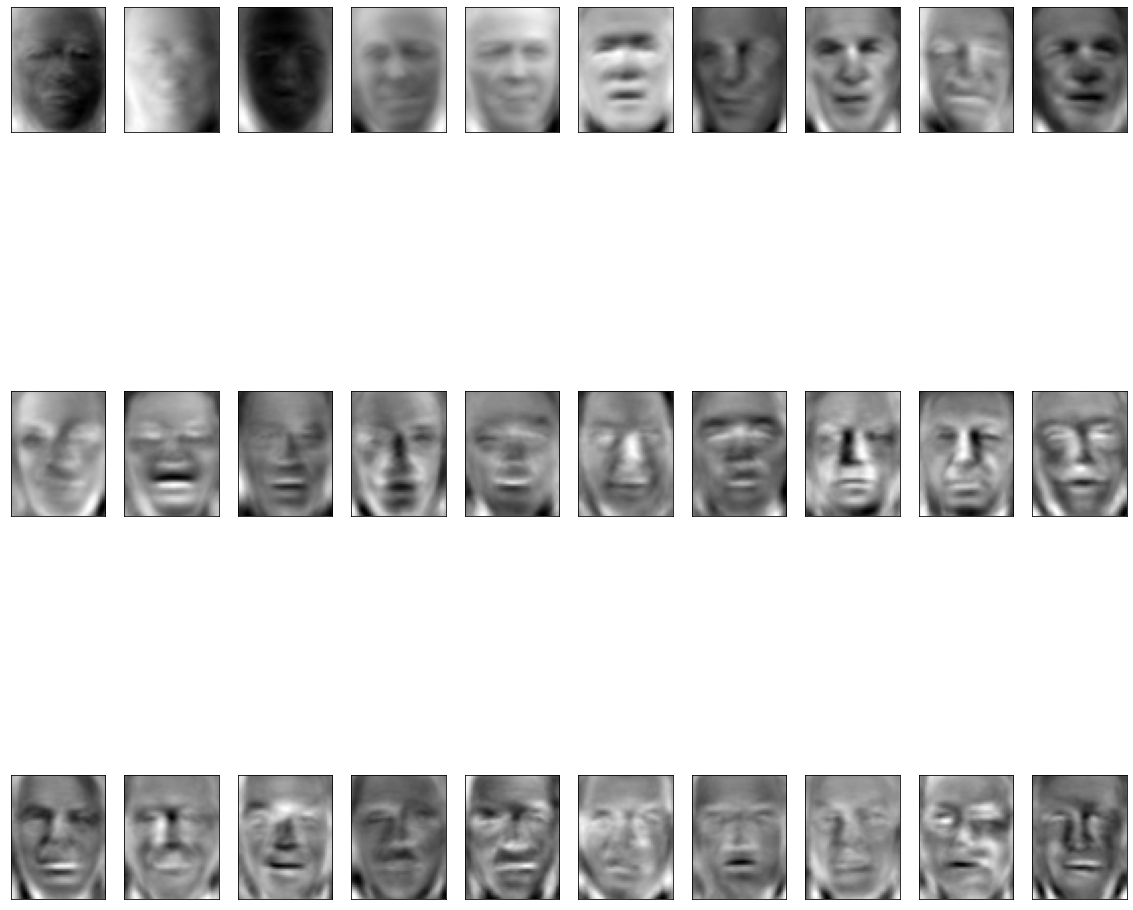

In [29]:
fig = plt.figure(figsize=(20, 20))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(h,w),
              cmap='gray')

Let's tranform the train and test data set using PCA 

In [30]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)

(798, 100)
(342, 100)


# Building Classifier

In [0]:
from sklearn.neural_network import MLPClassifier # it could be any classifier . Here we have used
#Multi layer perceptron

In [32]:
# In sklearn any classifier you build
# you use fit and predict
# fit for building model
# predict for evaluating model
# train a neural network
print("Fitting the classifier to the training set")#reduced dimensions
clf = MLPClassifier(hidden_layer_sizes=(1024,), \
                    batch_size=256, verbose=True, early_stopping=True).fit(X_train_pca, y_train)

Fitting the classifier to the training set
Iteration 1, loss = 1.54680934
Validation score: 0.600000
Iteration 2, loss = 1.10567590
Validation score: 0.600000
Iteration 3, loss = 0.88140226
Validation score: 0.600000
Iteration 4, loss = 0.69998302
Validation score: 0.650000
Iteration 5, loss = 0.54165541
Validation score: 0.712500
Iteration 6, loss = 0.42539963
Validation score: 0.737500
Iteration 7, loss = 0.34711480
Validation score: 0.762500
Iteration 8, loss = 0.28603098
Validation score: 0.775000
Iteration 9, loss = 0.23724341
Validation score: 0.775000
Iteration 10, loss = 0.19605711
Validation score: 0.775000
Iteration 11, loss = 0.16362984
Validation score: 0.775000
Iteration 12, loss = 0.13814554
Validation score: 0.775000
Iteration 13, loss = 0.11817889
Validation score: 0.775000
Iteration 14, loss = 0.10120346
Validation score: 0.775000
Iteration 15, loss = 0.08770421
Validation score: 0.775000
Iteration 16, loss = 0.07649747
Validation score: 0.787500
Iteration 17, loss = 0

In [33]:
# Predict and measure the efficiency of the classifier
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test_pca)
print(classification_report(y_test, y_pred, target_names=target_names))


                   precision    recall  f1-score   support

     Colin Powell       0.86      0.83      0.84        71
  Donald Rumsfeld       0.73      0.70      0.72        27
    George W Bush       0.82      0.93      0.87       150
Gerhard Schroeder       0.93      0.72      0.81        36
       Tony Blair       0.84      0.72      0.78        58

         accuracy                           0.83       342
        macro avg       0.84      0.78      0.80       342
     weighted avg       0.84      0.83      0.83       342



Lets take few images and plot them with the correct and predicted labels

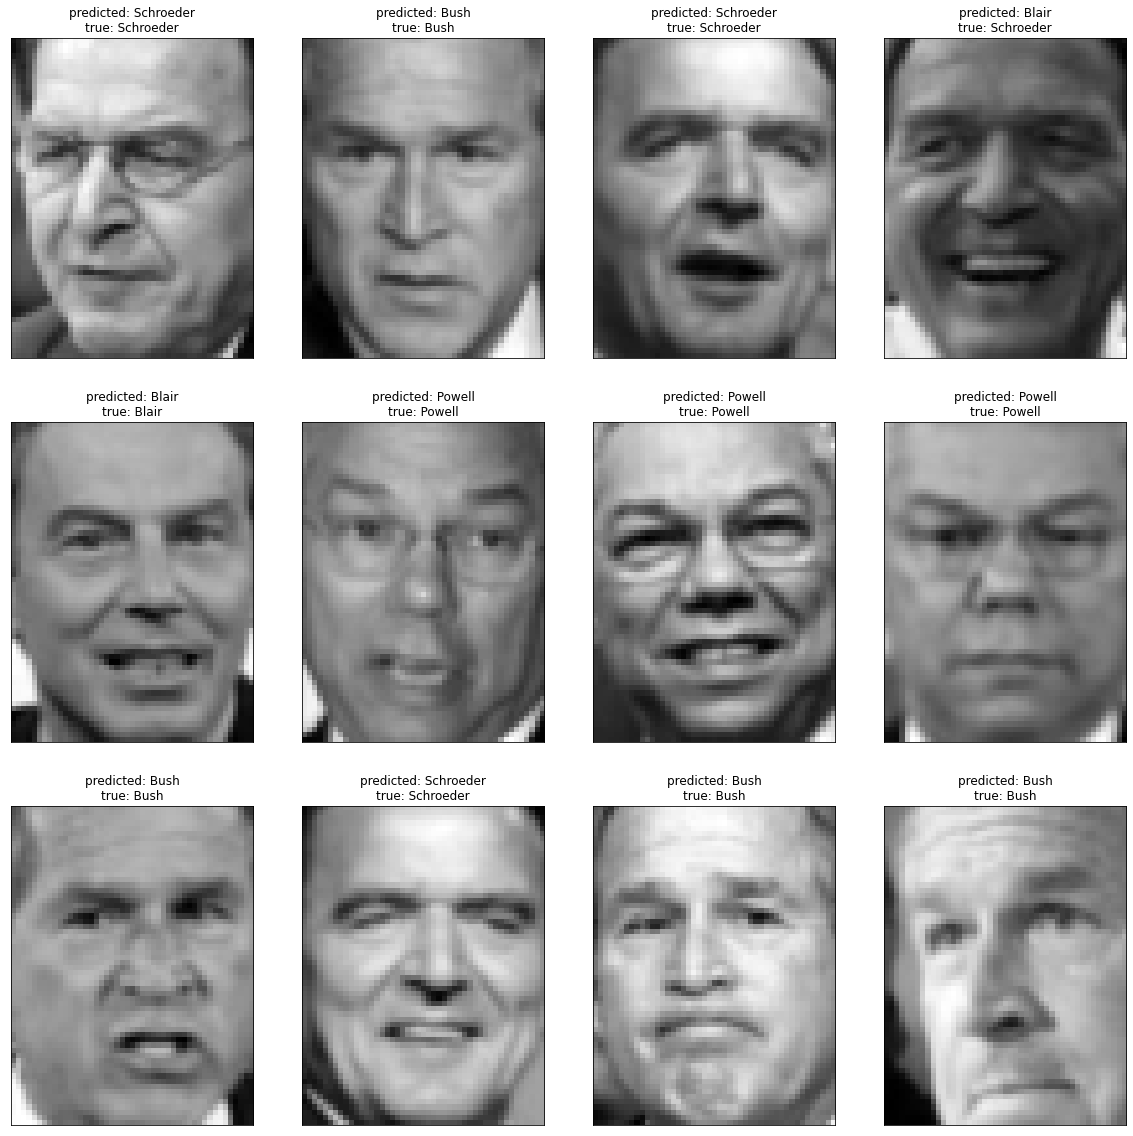

In [34]:
# Visualization
def plot_gallery(images, titles, h, w, rows=3, cols=4):
    plt.figure(figsize=(20,20))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())
 
def titles(y_pred, y_test, target_names):
    for i in range(y_pred.shape[0]):
        pred_name = target_names[y_pred[i]].split(' ')[-1]
        true_name = target_names[y_test[i]].split(' ')[-1]
        yield 'predicted: {0}\ntrue: {1}'.format(pred_name, true_name)
 
prediction_titles = list(titles(y_pred, y_test, target_names))
plot_gallery(X_test, prediction_titles, h, w)

Postlab:
Use a different dataset and implement PCA for dimensionality reduction and K Nearest neighbor classifier for classification

Evaluate the classifier for varying values of k and submit it as the report (Remember k should only  take odd values)